In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-11-15 06:54:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-15 06:54:21 (82.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
import pandas as pd
import glob as glob

data = pd.DataFrame()
data['human_paths'] = glob.glob("/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/full_texts/human/*.txt")
data['chatGpt_paths'] = glob.glob("/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/full_texts/chatgpt/*.txt")
data.head()

,human_paths,chatGpt_paths
0,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...
1,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...
2,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...
3,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...
4,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...


In [ ]:
def read_files(paths):
  essay_file = open(paths,'r+')
  essay = essay_file.read()
  essay_file.close()
  return essay

In [ ]:
data['Gpt_sentences'] = data['chatGpt_paths'].apply(read_files)
data['human_sentences'] = data['human_paths'].apply(read_files)
data.head()

,human_paths,chatGpt_paths,Gpt_sentences,human_sentences
0,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...,There are both advantages and disadvantages to...,It is difficult to decide whether to build a b...
1,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...,There is a longstanding debate over whether or...,Some people may think that money is the most i...
2,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...,There are several reasons why people are livin...,Many people believe that a large income equals...
3,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...,Both the ability to work with a group of peopl...,I fully agree with the claim that there is no ...
4,/content/drive/MyDrive/chatgpt-generated-text-...,/content/drive/MyDrive/chatgpt-generated-text-...,"If I could create a new holiday, I would honor...",Going to the movies is a pleasure for a lot of...


# Pre Processing

In [ ]:
import string

def remove_puntuation(text):
  punctuationfree = "".join([i for i in text if i not in string.punctuation])
  return punctuationfree

In [ ]:
wiki_sentences = pd.DataFrame()
gpt_sentences = pd.DataFrame()

wiki_sentences['text'] = data['human_sentences']
wiki_sentences['label'] = 0

gpt_sentences['text'] = data['Gpt_sentences']
gpt_sentences['label'] = 1

wiki_sentences.head(), gpt_sentences.head()

(                                                text  label
 0  It is difficult to decide whether to build a b...      0
 1  Some people may think that money is the most i...      0
 2  Many people believe that a large income equals...      0
 3  I fully agree with the claim that there is no ...      0
 4  Going to the movies is a pleasure for a lot of...      0,
                                                 text  label
 0  There are both advantages and disadvantages to...      1
 1  There is a longstanding debate over whether or...      1
 2  There are several reasons why people are livin...      1
 3  Both the ability to work with a group of peopl...      1
 4  If I could create a new holiday, I would honor...      1)

# Removing Punctuations

In [ ]:
wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: remove_puntuation(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: remove_puntuation(x))

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  It is difficult to decide whether to build a b...      0
1  Some people may think that money is the most i...      0
2  Many people believe that a large income equals...      0
3  I fully agree with the claim that there is no ...      0
4  Going to the movies is a pleasure for a lot of...      0
                                                text  label
0  There are both advantages and disadvantages to...      1
1  There is a longstanding debate over whether or...      1
2  There are several reasons why people are livin...      1
3  Both the ability to work with a group of peopl...      1
4  If I could create a new holiday I would honor ...      1


# Converting to Lower Case

In [ ]:
wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: x.lower())
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: x.lower())

In [ ]:
type(wiki_sentences['text'][0])

str

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  it is difficult to decide whether to build a b...      0
1  some people may think that money is the most i...      0
2  many people believe that a large income equals...      0
3  i fully agree with the claim that there is no ...      0
4  going to the movies is a pleasure for a lot of...      0
                                                text  label
0  there are both advantages and disadvantages to...      1
1  there is a longstanding debate over whether or...      1
2  there are several reasons why people are livin...      1
3  both the ability to work with a group of peopl...      1
4  if i could create a new holiday i would honor ...      1


Tokenization - splitting sentences into words

In [ ]:
import re

def tokenization(text):
  tokens = text.split(" ")
  return tokens

wiki_sentences['text'] = wiki_sentences['text'].apply(tokenization)
gpt_sentences['text'] = gpt_sentences['text'].apply(tokenization)

In [ ]:
type(wiki_sentences['text'][0][0])

str

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  [it, is, difficult, to, decide, whether, to, b...      0
1  [some, people, may, think, that, money, is, th...      0
2  [many, people, believe, that, a, large, income...      0
3  [i, fully, agree, with, the, claim, that, ther...      0
4  [going, to, the, movies, is, a, pleasure, for,...      0
                                                text  label
0  [there, are, both, advantages, and, disadvanta...      1
1  [there, is, a, longstanding, debate, over, whe...      1
2  [there, are, several, reasons, why, people, ar...      1
3  [both, the, ability, to, work, with, a, group,...      1
4  [if, i, could, create, a, new, holiday, i, wou...      1


# Stop Words Removal

In [ ]:
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:30]
if('is' in stopwords):
  print("yes")

yes


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  output = [i for i in text if i not in stopwords]
  return output


wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: remove_stopwords(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  [difficult, decide, whether, build, business, ...      0
1  [people, may, think, money, important, aspect,...      0
2  [many, people, believe, large, income, equals,...      0
3  [fully, agree, claim, correlation, success, lu...      0
4  [going, movies, pleasure, lot, people, im, one...      0
                                                text  label
0  [advantages, disadvantages, working, either, l...      1
1  [longstanding, debate, whether, boys, girls, a...      1
2  [several, reasons, people, living, longer, pas...      1
3  [ability, work, group, people, team, work, ind...      1
4  [could, create, new, holiday, would, honor, pe...      1


# Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

def list_to_sent(l):
  sent = " ".join(l)
  return sent

wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: lemmatizer(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: lemmatizer(x))

wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: list_to_sent(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: list_to_sent(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
dataset = pd.concat([wiki_sentences, gpt_sentences])
dataset.head()

,text,label
0,difficult decide whether build business resear...,0
1,people may think money important aspect job co...,0
2,many people believe large income equal success...,0
3,fully agree claim correlation success luck mor...,0
4,going movie pleasure lot people im one really ...,0


In [ ]:
dataset_shuffled = dataset.sample(frac = 1, random_state = 41)
dataset_shuffled.head()

,text,label
39,asking student evaluate teacher useful tool im...,1
6,issue child help household task one open debat...,0
111,many people believe one successful committed h...,0
46,people move another country often face decisio...,1
115,mean transportation kept good condition howeve...,0


# Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(dataset_shuffled['text'].to_numpy(),
                                                                             dataset_shuffled['label'].to_numpy(),
                                                                                              test_size = 0.3,
                                                                                              random_state = 42)

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences,
                                                                            train_labels,
                                                                            test_size = 0.1,
                                                                            random_state = 42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels), len(test_sentences), len(test_labels)

(158, 158, 18, 18, 76, 76)

In [ ]:
import numpy as np

unique, frequency = np.unique(train_labels, return_counts=True)

print('train data')
print("unique values ",unique)
print("frequency values ",frequency)

unique, frequency = np.unique(val_labels, return_counts=True)
print()
print('val data')
print("unique values ",unique)
print("frequency values ",frequency)

train data
unique values  [0 1]
frequency values  [72 86]

val data
unique values  [0 1]
frequency values  [12  6]


In [ ]:
train_labels

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1])

# Text Vectorization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

184

In [ ]:
max_vocab_length = 10000
max_length = 184

In [ ]:
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "Artificial Intelligence (AI) has revolutionized countless aspects of our lives, from personalized recommendations on streaming platforms to self-driving cars. Its ability to analyze vast datasets and make predictions has immense potential in healthcare, finance, and more. However, concerns about data privacy, algorithmic bias, and job displacement loom large. As we harness AI's power, we must also prioritize ethical and regulatory frameworks to ensure it serves humanity's best interests, striking a delicate balance between innovation and responsibility in this ever-evolving technological landscape."
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 184), dtype=int64, numpy=
array([[4157, 1106,    1,    1, 1227, 1672,    1,  956, 3116, 1280, 2117,
        1505,    1,  117,    1,    1,  650,    1,    1,    1,  190,  650,
        2333, 1198,    1,    1,   14,    1,    1, 2069,  127,   25, 1590,
           1,    1, 1991,   37,    1, 4265, 1145, 1496,    1, 1171,    1,
          27,    1,    1,  202, 1371, 2443, 3463,    1,  460, 2443,  503,
           9,  543, 2163,    1,    1,    1,  650,  572,  408,    1,    1,
          70, 3355, 2666, 1383,    1,  253,    1, 1107,    1,  217,   25,
        1783,    1,  908, 3305,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 4280
Top 5 most common words: ['', '[UNK]', 'people', 'one', 'would']
Bottom 5 least common words: ['1870’s', '18', '15', '10000', '1']


# Embedding Layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)

embedding

In [ ]:
import random
random_sentence = random.choice(train_sentences)

print(f"Original text:\n {random_sentence}\
        \n\nEmbedde version: ")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 one custom country would like people country adopt concept hygge denmark hygge danish term refers feeling cozy contentment wellbeing enjoying simple thing life
there many specific reason think custom would valuable people country adopt first foremost focus enjoying simple pleasure creating sense warmth comfort help reduce stress increase overall happiness today fastpaced world easy get caught hustle bustle forget take time relax appreciate small thing adopting custom hygge people make conscious effort slow savor present moment whether lighting candle sipping warm beverage snuggling good book
another reason think custom hygge would beneficial people country promotes sense community togetherness many people denmark practice hygge gathering friend loved one sharing activity bring feeling connection companionship especially important today world technology busy schedule often make difficult maintain close relationship adopting custom hygge people make concerted effort prior

<tf.Tensor: shape=(1, 184, 128), dtype=float32, numpy=
array([[[ 0.03296078,  0.00081497,  0.02104825, ...,  0.03580223,
          0.02715481, -0.00825646],
        [-0.00281259,  0.03304407, -0.02922702, ...,  0.02663021,
         -0.00847835, -0.00858599],
        [-0.0050987 , -0.02823453, -0.04173418, ...,  0.03173068,
         -0.02298436, -0.0224736 ],
        ...,
        [ 0.00619299,  0.03785015,  0.03031992, ..., -0.04365685,
         -0.03307335, -0.00660693],
        [ 0.00619299,  0.03785015,  0.03031992, ..., -0.04365685,
         -0.03307335, -0.00660693],
        [ 0.00619299,  0.03785015,  0.03031992, ..., -0.04365685,
         -0.03307335, -0.00660693]]], dtype=float32)>

In [ ]:
type(train_sentences[0])

str

# Model 0: Getting a baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2),
)

model_0 = Pipeline([
    ('tfid', tfidf_vectorizer),
    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(test_sentences, test_labels)
print(f"Our baseline model accuracy = {baseline_score*100:.2f}%")

Our baseline model accuracy = 72.22%


In [ ]:
baseline_preds = model_0.predict(test_sentences)
baseline_preds[:20]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}

  return model_results

In [ ]:
baseline_results = calculate_results(y_true = test_labels,
                                      y_pred = baseline_preds)
baseline_results

{'accuracy': 72.22222222222221,
 'precision': 0.7777777777777778,
 'recall': 0.7222222222222222,
 'f1': 0.7301587301587302}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

alpha_value = 0.1
fit_prior_value = False
class_prior_values = [0.4, 0.6]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Fit and transform the training data with the TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(train_sentences)

# Fit the XGBoost classifier on the training data
NB_classifier = MultinomialNB(alpha=alpha_value, fit_prior=fit_prior_value, class_prior=class_prior_values)
NB_classifier.fit(X_train_tfidf, train_labels)

# Transform the test data with the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_sentences)

# Make predictions using the XGBoost classifier
y_pred = NB_classifier.predict(X_test_tfidf)


In [ ]:
pip install shap scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 10.2 MB/s eta 0:00:00


In [ ]:
import shap

  0%|          | 0/1 [00:00<?, ?it/s]

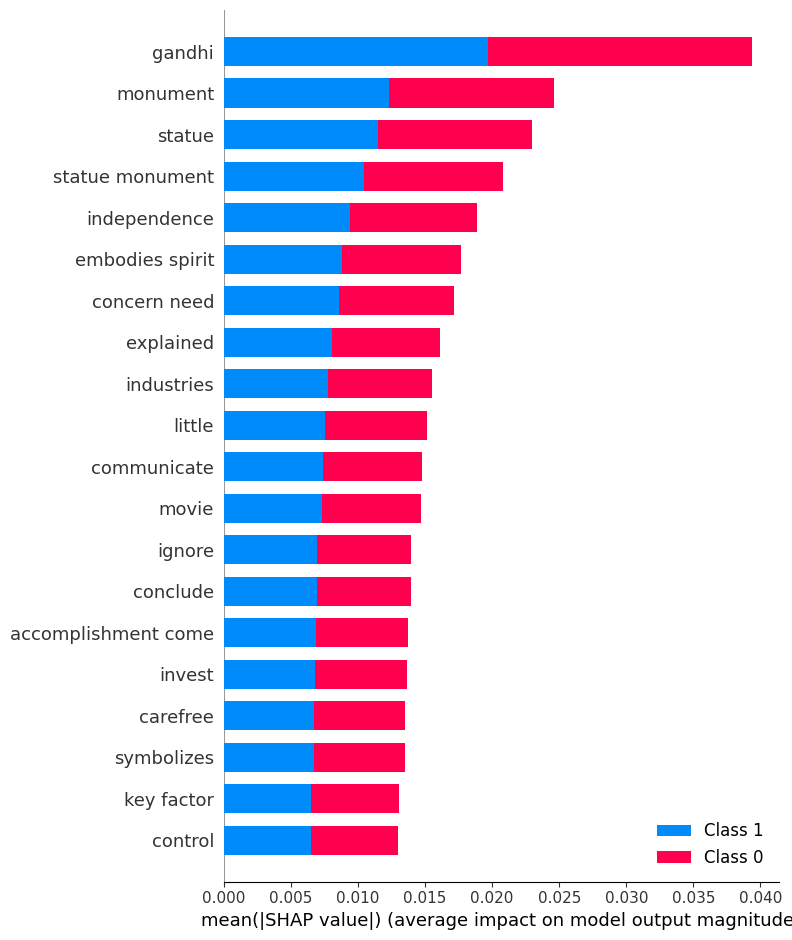

In [ ]:
#explainer = shap.Explainer(NB_classifier, X_train_tfidf)
explainer = shap.KernelExplainer(NB_classifier.predict_proba, X_train_tfidf[0:50])

# Explain predictions for a specific instance (change the index according to your dataset)
instance_idx = 0
shap_values = explainer.shap_values(X_train_tfidf[instance_idx])

# Summarize the feature importance
shap.summary_plot(shap_values, feature_names=tfidf_vectorizer.get_feature_names_out())

In [ ]:
shap.plots.bar(shap_values)

TypeError: ignored

In [ ]:
shap.plots.beeswarm(shap_values)

TypeError: ignored

## XGBoost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier


tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2),
)

xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)\

pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('xgb', xgb_classifier)
])


pipeline.fit(train_sentences, train_labels)
y_pred = pipeline.predict(test_sentences)



In [ ]:
pipeline

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9210526315789473


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}

  return model_results

In [ ]:
baseline_results = calculate_results(y_true = test_labels,
                                      y_pred = y_pred)
baseline_results

{'accuracy': 92.10526315789474,
 'precision': 0.9265927977839337,
 'recall': 0.9210526315789473,
 'f1': 0.9212719298245614}

In [ ]:
# new for shap

In [ ]:
type(train_sentences)

numpy.ndarray

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Fit and transform the training data with the TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(train_sentences)

# Fit the XGBoost classifier on the training data
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_classifier.fit(X_train_tfidf, train_labels)

# Transform the test data with the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_sentences)

# Make predictions using the XGBoost classifier
y_pred = xgb_classifier.predict(X_test_tfidf)


In [ ]:
sample = "great to hear that you have extensive experience in data modeling and data analysis, as well as proficiency in gathering business requirements and managing requirements. This combination of skills is valuable in many industries, especially in roles related to data-driven decision-making and analytics.Expertise in data modeling involves designing the structure of databases and data warehouses, ensuring that they are efficient and can support the analytical needs of an organization. Data analysis, on the other hand, involves extracting insights and patterns from data, which can inform strategic decisions. Being proficient in gathering business requirements and managing requirements is also crucial. This means you can bridge the gap between technical and non-technical stakeholders, ensuring that the data and analysis efforts align with the organization's objectives."

In [ ]:
sample = remove_puntuation(sample)
sample = sample.lower()
sample = tokenization(sample)
sample = remove_stopwords(sample)
sample = lemmatizer(sample)
sample = list_to_sent(sample)

sample = tfidf_vectorizer.transform([sample])
output = xgb_classifier.predict(sample)

In [ ]:
output[0]

0

In [ ]:
train_sentences.shape

(158,)

In [ ]:
X_train_tfidf.shape
X_test_tfidf.shape

(76, 5000)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9210526315789473


In [ ]:
explainer = shap.Explainer(xgb_classifier)
shap_values = explainer(X_train_tfidf[0:100])

[05:56:54] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[05:56:55] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [ ]:
print(shap_values.shape)

(100, 5000)


IndexError: ignored

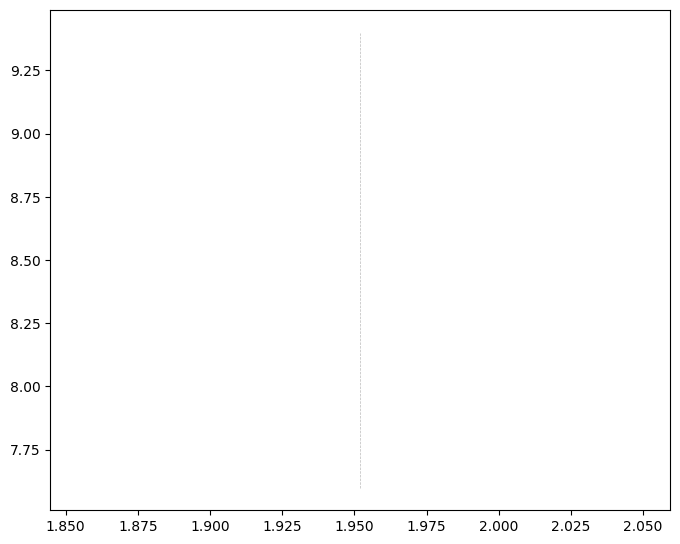

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values.shape

(100, 5000)

In [ ]:
np.shape(shap_values.values)

(100, 5000)

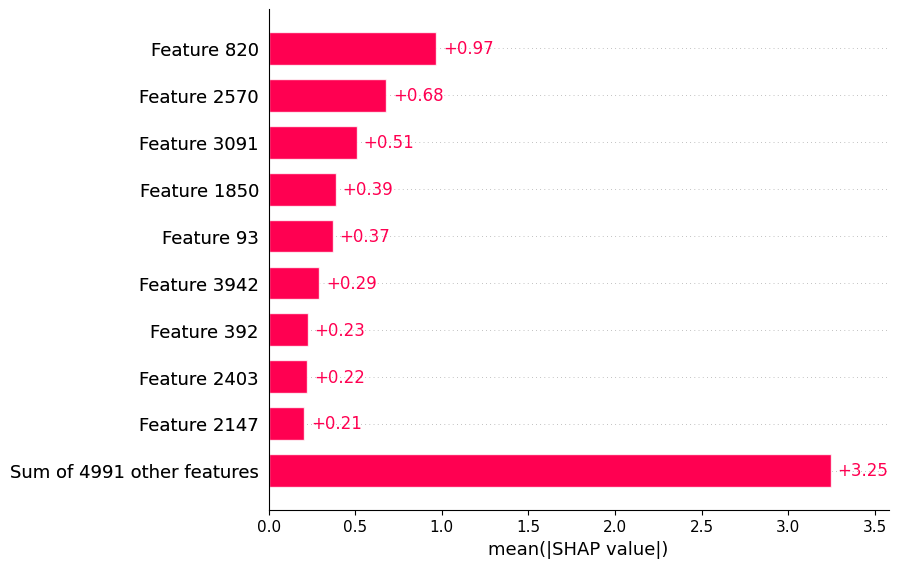

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
l = tfidf_vectorizer.get_feature_names_out()
print(l)

['ability' 'ability communicate' 'ability provide' ... 'youth' 'zone'
 'zone taking']


In [ ]:
l[820], l[2570],l[3091], l[1850], l[93], l[3942], l[2403], l[392], l[2538]

('conclusion',
 'like',
 'overall',
 'good',
 'additionally',
 'sense',
 'know',
 'believe',
 'life')

In [ ]:
l[820], l[2570],l[3091], l[1850], l[93], l[3942], l[2403], l[2147]

('conclusion',
 'like',
 'overall',
 'good',
 'additionally',
 'sense',
 'know',
 'important')

[05:57:10] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


IndexError: ignored

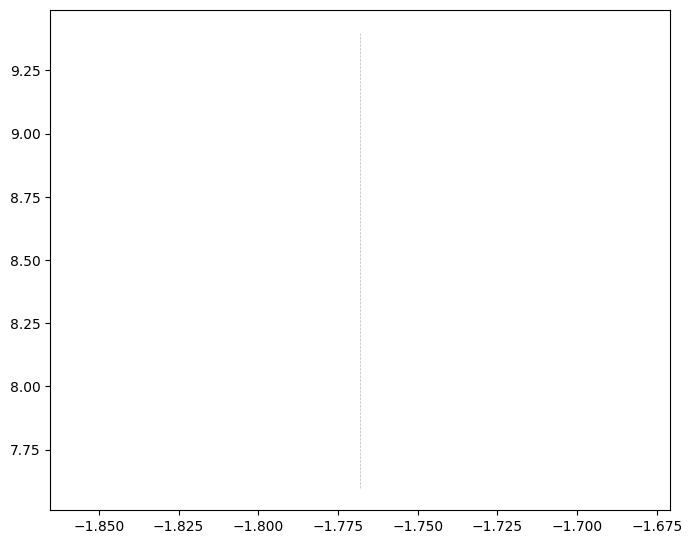

In [ ]:
import shap

# Initialize SHAP explainer with the trained classifier
explainer = shap.Explainer(xgb_classifier)

# Compute Shapley values for the test data
shap_values = explainer(X_test_tfidf[0:100])

# Choose a specific prediction index you want to explain (e.g., the first one)
prediction_index = 0

# Create a waterfall plot for the selected prediction
shap.plots.waterfall(shap_values[prediction_index])

In [ ]:
shap.plots.force(shap_values[0:158])

KeyboardInterrupt: ignored

IndexError: ignored

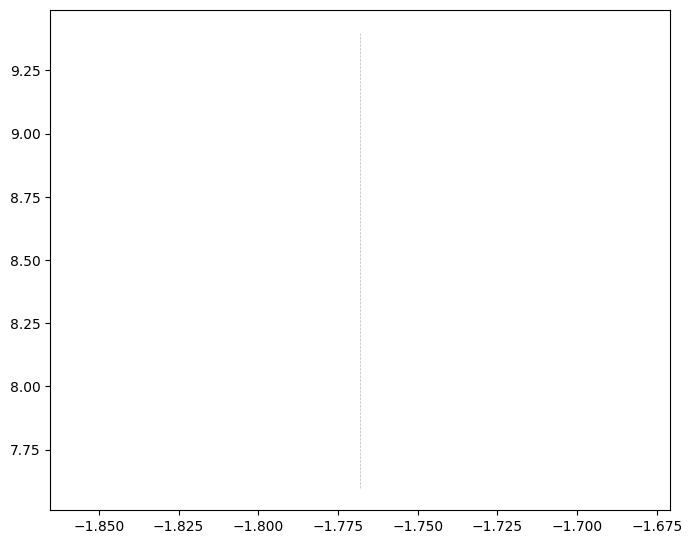

In [ ]:
shap.plots.waterfall(shap_values[0])

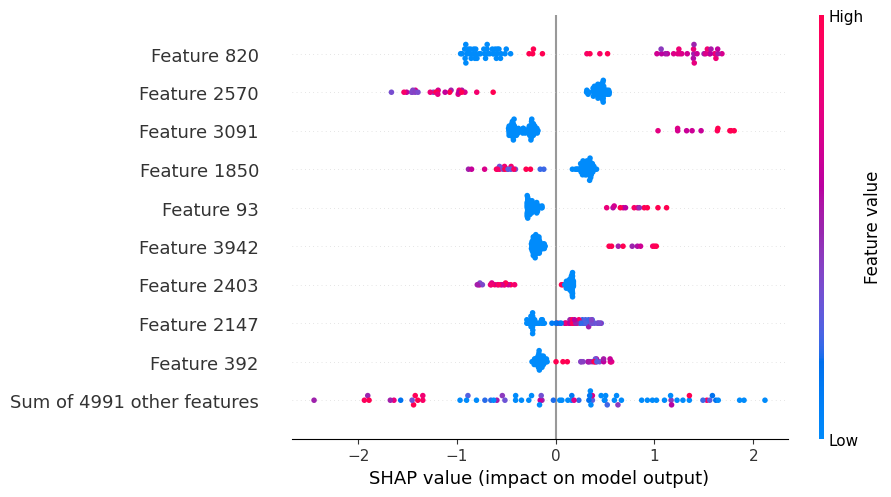

In [ ]:
shap.plots.beeswarm(shap_values)

ValueError: ignored

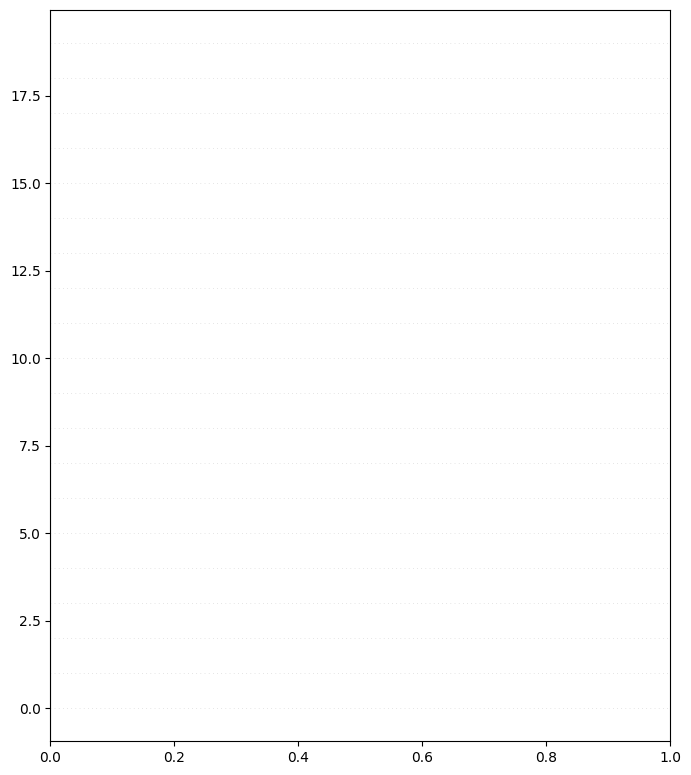

In [ ]:
shap.plots.violin(shap_values)

[05:58:35] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


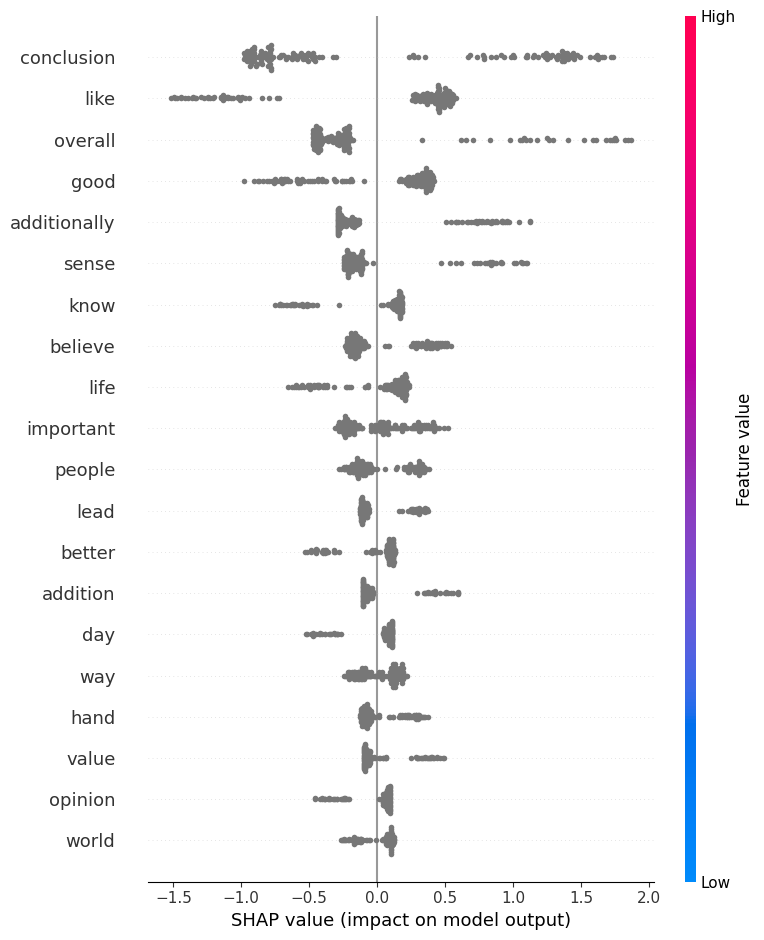

In [ ]:
explainer = shap.Explainer(xgb_classifier)

# Step 3: Compute Shapley values for the test data
shap_values = explainer.shap_values(X_train_tfidf)

# Step 4: Visualize the explanations

custom_colors = ["red", "blue"]

shap.summary_plot(shap_values, X_train_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out(), color=['red'])

not enough data in bin #0 for feature Feature 4960, so it'll be ignored. Try increasing the number of records to plot.
invalid value encountered in divide


ZeroDivisionError: ignored

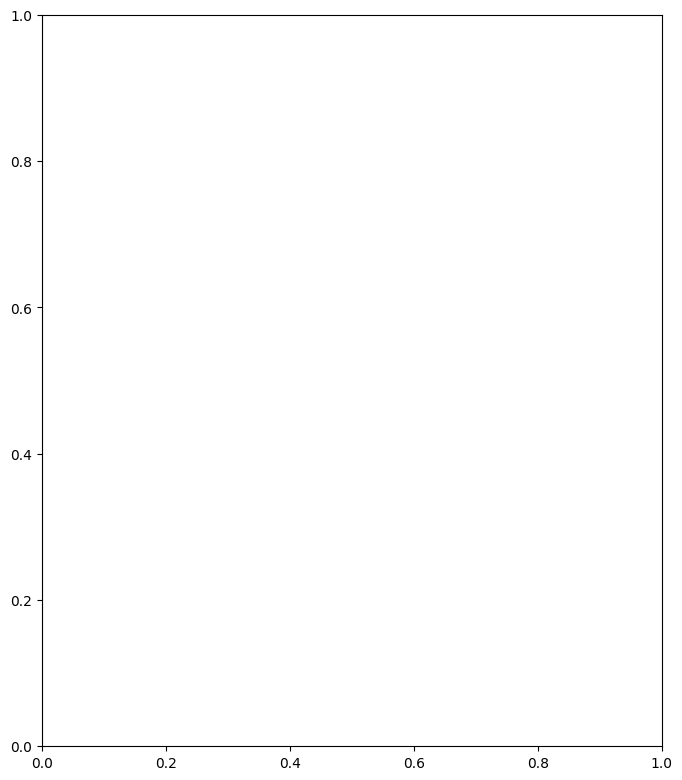

In [ ]:
shap.plots.violin(shap_values, plot_type="layered_violin")

## SHAP

In [ ]:
pip install shap scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix

import shap
shap.initjs()

In [ ]:
attrib_data = X_train_tfidf[:200]
explainer = shap.DeepExplainer(xgb_classifier, attrib_data)
num_explanations = 20
shap_vals = explainer.shap_values(X_test_tfidf[:num_explanations])
words = processor._tokenizer.word_index
word_lookup = list()
for i in words.keys():
  word_lookup.append(i)
word_lookup = [''] + word_lookup
shap.summary_plot(shap_vals, feature_names=word_lookup, class_names=tag_encoder.classes_)

In [ ]:
attrib_data = X_train_tfidf[:200]
explainer = shap.DeepExplainer(xgb_classifier, attrib_data)
num_explanations = 20
shap_vals = explainer.shap_values(X_test_tfidf[:num_explanations])
shap.plots.waterfall(shap_values[0])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


AssertionError: ignored

In [ ]:
shape.plots.waterfall(shap_values[0])

# Model 1: A Simple dense Model

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(100, activation = 'relu')(x)
x = layers.Dense(50, activation = 'relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(10, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model1 = tf.keras.Model(inputs, outputs, name = 'model_1_dense')

In [ ]:
model1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 184)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 184, 128)          1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [ ]:
# Fit the model
model1_history = model1.fit(x = train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              y = train_labels,
                              epochs=15,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20231002-164008
Epoch 1/15
5/5 [==============================] - 2s 235ms/step - loss: 0.6888 - accuracy: 0.6582 - val_loss: 0.6888 - val_accuracy: 0.7222
Epoch 2/15
5/5 [==============================] - 1s 254ms/step - loss: 0.6700 - accuracy: 0.8797 - val_loss: 0.6845 - val_accuracy: 0.6667
Epoch 3/15
5/5 [==============================] - 2s 331ms/step - loss: 0.6523 - accuracy: 0.9114 - val_loss: 0.6810 - val_accuracy: 0.6667
Epoch 4/15
5/5 [==============================] - 2s 302ms/step - loss: 0.6352 - accuracy: 0.9367 - val_loss: 0.6770 - val_accuracy: 0.6667
Epoch 5/15
5/5 [==============================] - 1s 140ms/step - loss: 0.6179 - accuracy: 0.9620 - val_loss: 0.6729 - val_accuracy: 0.6667
Epoch 6/15
5/5 [==============================] - 1s 192ms/step - loss: 0.6017 - accuracy: 0.9684 - val_loss: 0.6685 - val_accuracy: 0.6667
Epoch 7/15
5/5 [==============================] - 1s 139ms/step - loss: 0.5857 - 

In [ ]:
model1.evaluate(test_sentences, test_labels)

1/1 [==============================] - 0s 25ms/step - loss: 0.6279 - accuracy: 0.6667


[0.6278985738754272, 0.6666666865348816]

In [ ]:
model1_preds = model1.predict(test_sentences)

1/1 [==============================] - 0s 105ms/step


In [ ]:
model1_preds = tf.squeeze(tf.round(model1_preds))
model1_preds[:20]

<tf.Tensor: shape=(18,), dtype=float32, numpy=
array([1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0.], dtype=float32)>

In [ ]:
model1_results = calculate_results(y_true=test_labels,
                                    y_pred = model1_preds)

model1_results

{'accuracy': 66.66666666666666,
 'precision': 0.75,
 'recall': 0.6666666666666666,
 'f1': 0.675}

# Visualize learned Embeeddings

In [ ]:
words_in_vocal = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:20]

(4280,
 ['',
  '[UNK]',
  'people',
  'one',
  'would',
  'may',
  'life',
  'time',
  'student',
  'also',
  'important',
  'work',
  'way',
  'friend',
  'make',
  'many',
  'new',
  'good',
  'example',
  'help'])

In [ ]:
embed_weights = model1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
import io
# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 2 LSTM

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True)(x) # when you're stacking RNN cells together set return sequences = True
x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(256, return_sequences = True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model2 = tf.keras.Model(inputs, outputs, name = 'model2_LSTM')

In [ ]:
model2.summary()

Model: "model2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 184)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 184, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 184, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                       

In [ ]:
model2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model2_history = model2.fit(train_sentences,
                            train_labels,
                            epochs = 15,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model2_LSTM")])

Saving TensorBoard log files to: model_logs/model2_LSTM/20231002-164113
Epoch 1/15
5/5 [==============================] - 2s 268ms/step - loss: 0.1129 - accuracy: 0.9747 - val_loss: 1.3094 - val_accuracy: 0.6667
Epoch 2/15
5/5 [==============================] - 1s 249ms/step - loss: 0.0703 - accuracy: 0.9873 - val_loss: 1.1883 - val_accuracy: 0.7222
Epoch 3/15
5/5 [==============================] - 1s 347ms/step - loss: 0.0667 - accuracy: 0.9873 - val_loss: 1.1555 - val_accuracy: 0.7222
Epoch 4/15
5/5 [==============================] - 1s 173ms/step - loss: 0.0391 - accuracy: 0.9937 - val_loss: 1.1308 - val_accuracy: 0.7222
Epoch 5/15
5/5 [==============================] - 1s 195ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 1.1432 - val_accuracy: 0.7222
Epoch 6/15
5/5 [==============================] - 1s 175ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.1793 - val_accuracy: 0.7222
Epoch 7/15
5/5 [==============================] - 1s 195ms/step - loss: 0.0087 - accurac

In [ ]:
model2_pred_probs = model2.predict(test_sentences)
model2_pred_probs[:10]

1/1 [==============================] - 1s 693ms/step


array([[0.99723274],
       [0.99763167],
       [0.00221741],
       [0.01895314],
       [0.00245261],
       [0.00291504],
       [0.00246333],
       [0.00270435],
       [0.9976793 ],
       [0.99760395]], dtype=float32)

In [ ]:
model2_preds = tf.squeeze(tf.round(model2_pred_probs))
model2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 0., 1., 1.], dtype=float32)>

In [ ]:
model2_results = calculate_results(y_true = test_labels,
                                   y_pred = model2_preds)
model2_results

{'accuracy': 72.22222222222221,
 'precision': 0.735930735930736,
 'recall': 0.7222222222222222,
 'f1': 0.7268673355629877}

# Model 3: GRU

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences = True)(x)
x = layers.LSTM(128, return_sequences = True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model3 = tf.keras.Model(inputs, outputs, name = "model3_GRU")

In [ ]:
model3.summary()

Model: "model3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 184)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 184, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 184, 64)           37248     
                                                                 
 lstm_2 (LSTM)               (None, 184, 64)           33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                        

In [ ]:
model3.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model3_history = model3.fit(train_sentences,
                            train_labels,
                            epochs = 15,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model3_GRU")])

Saving TensorBoard log files to: model_logs/model3_GRU/20231002-164144
Epoch 1/15
5/5 [==============================] - 12s 711ms/step - loss: 0.6638 - accuracy: 0.7722 - val_loss: 0.6826 - val_accuracy: 0.5556
Epoch 2/15
5/5 [==============================] - 1s 335ms/step - loss: 0.5357 - accuracy: 0.8228 - val_loss: 0.6932 - val_accuracy: 0.5556
Epoch 3/15
5/5 [==============================] - 1s 262ms/step - loss: 0.3668 - accuracy: 0.8481 - val_loss: 0.5941 - val_accuracy: 0.7778
Epoch 4/15
5/5 [==============================] - 2s 347ms/step - loss: 0.1568 - accuracy: 0.9557 - val_loss: 0.5661 - val_accuracy: 0.8333
Epoch 5/15
5/5 [==============================] - 1s 284ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.9045 - val_accuracy: 0.8333
Epoch 6/15
5/5 [==============================] - 1s 206ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.1969 - val_accuracy: 0.8333
Epoch 7/15
5/5 [==============================] - 1s 212ms/step - loss: 5.6616e-04 - acc

In [ ]:
model3_pred_probs = model3.predict(test_sentences)
model3_pred_probs[:10]

1/1 [==============================] - 2s 2s/step


array([[9.8322254e-01],
       [1.7445932e-04],
       [1.1980300e-04],
       [9.9906856e-01],
       [1.5380491e-04],
       [4.4072804e-04],
       [1.5389851e-04],
       [1.6665182e-04],
       [9.9878663e-01],
       [9.9908388e-01]], dtype=float32)

In [ ]:
model3_preds = tf.squeeze(tf.round(model3_pred_probs))
model3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1.], dtype=float32)>

In [ ]:
model3_results = calculate_results(y_true = test_labels,
                                   y_pred = model3_preds)
model3_results

{'accuracy': 83.33333333333334,
 'precision': 0.8441558441558441,
 'recall': 0.8333333333333334,
 'f1': 0.8361204013377926}

# Model 4 Bi Direactional RNN

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.GRU(128))(x)
x = layers.Bidirectional(layers.GRU(100))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)
model4 = tf.keras.Model(inputs, outputs, name = "model4_BI")

In [ ]:
model4.summary()

Model: "model4_BI"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 184)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 184, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 184, 128)          98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                         

In [ ]:
model4.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model4_history = model4.fit(train_sentences,
                            train_labels,
                            epochs = 15,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model4_Bi-directional")])

Saving TensorBoard log files to: model_logs/model4_Bi-directional/20231002-164245
Epoch 1/15
5/5 [==============================] - 10s 515ms/step - loss: 0.6210 - accuracy: 0.8671 - val_loss: 0.6573 - val_accuracy: 0.6111
Epoch 2/15
5/5 [==============================] - 1s 219ms/step - loss: 0.3904 - accuracy: 0.9241 - val_loss: 0.6894 - val_accuracy: 0.6111
Epoch 3/15
5/5 [==============================] - 1s 231ms/step - loss: 0.1222 - accuracy: 0.9557 - val_loss: 0.7552 - val_accuracy: 0.7222
Epoch 4/15
5/5 [==============================] - 1s 211ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.7046 - val_accuracy: 0.8333
Epoch 5/15
5/5 [==============================] - 1s 172ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.8953 - val_accuracy: 0.8333
Epoch 6/15
5/5 [==============================] - 1s 259ms/step - loss: 0.0258 - accuracy: 0.9937 - val_loss: 1.3999 - val_accuracy: 0.7222
Epoch 7/15
5/5 [==============================] - 1s 284ms/step - loss: 0.017

In [ ]:
model4_pred_probs = model4.predict(test_sentences)
model4_pred_probs[:10]

1/1 [==============================] - 1s 1s/step


array([[8.9369714e-01],
       [5.6372058e-01],
       [1.8555958e-05],
       [4.2194788e-05],
       [2.0719328e-05],
       [5.9301499e-05],
       [1.4490786e-05],
       [2.5015253e-05],
       [5.3702790e-01],
       [8.9868167e-03]], dtype=float32)

In [ ]:
model4_preds = tf.squeeze(tf.round(model4_pred_probs))
model4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

In [ ]:
model4_results = calculate_results(y_true = test_labels,
                                   y_pred = model4_preds)
model4_results

{'accuracy': 66.66666666666666,
 'precision': 0.6666666666666666,
 'recall': 0.6666666666666666,
 'f1': 0.6666666666666666}

# Model 5 Conv1D

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid')(x)
x = layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model5 = tf.keras.Model(inputs, outputs, name = "Model5_Conv1D")

model5.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model5.summary()

Model: "Model5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 184)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 184, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 180, 64)           41024     
                                                                 
 global_average_pooling1d_2  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 1)               

In [ ]:
model5_history = model5.fit(train_sentences,
                            train_labels,
                            epochs = 15,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model4_Conv1D")])

Saving TensorBoard log files to: model_logs/model4_Conv1D/20231002-164332
Epoch 1/15
5/5 [==============================] - 8s 429ms/step - loss: 0.5898 - accuracy: 0.8734 - val_loss: 0.5936 - val_accuracy: 0.8889
Epoch 2/15
5/5 [==============================] - 2s 322ms/step - loss: 0.3853 - accuracy: 1.0000 - val_loss: 0.5265 - val_accuracy: 0.8333
Epoch 3/15
5/5 [==============================] - 1s 275ms/step - loss: 0.2436 - accuracy: 1.0000 - val_loss: 0.4783 - val_accuracy: 0.8333
Epoch 4/15
5/5 [==============================] - 1s 161ms/step - loss: 0.1505 - accuracy: 1.0000 - val_loss: 0.4481 - val_accuracy: 0.7222
Epoch 5/15
5/5 [==============================] - 1s 187ms/step - loss: 0.0943 - accuracy: 1.0000 - val_loss: 0.4302 - val_accuracy: 0.6667
Epoch 6/15
5/5 [==============================] - 1s 129ms/step - loss: 0.0610 - accuracy: 1.0000 - val_loss: 0.4205 - val_accuracy: 0.6667
Epoch 7/15
5/5 [==============================] - 1s 130ms/step - loss: 0.0417 - accur

In [ ]:
model5_pred_probs = model5.predict(test_sentences)
model5_pred_probs[:10]

1/1 [==============================] - 0s 144ms/step


array([[0.57683545],
       [0.3844719 ],
       [0.21610789],
       [0.40379348],
       [0.5079406 ],
       [0.01543063],
       [0.5598855 ],
       [0.02980686],
       [0.92892385],
       [0.8176748 ]], dtype=float32)

In [ ]:
model5_preds = tf.squeeze(tf.round(model5_pred_probs))
model5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1.], dtype=float32)>

In [ ]:
model5_results = calculate_results(y_true = test_labels,
                                   y_pred = model5_preds)
model5_results

{'accuracy': 66.66666666666666,
 'precision': 0.7000000000000001,
 'recall': 0.6666666666666666,
 'f1': 0.6753246753246753}

# Model 6: Tensorflow Hub pretrained Sentence Encoder

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.06462538 -0.05723969  0.02033905  0.00854338  0.03198102 -0.05494181
 -0.02973787 -0.00784131  0.04485302 -0.06055634 -0.04039748  0.02377327
  0.03573933 -0.01164925  0.03297416 -0.04821496  0.06113218 -0.04239954
  0.04982507 -0.01694495  0.06699113  0.07027017  0.0172698   0.05281517
  0.06867666  0.03043227  0.02886276  0.04559603 -0.07040984 -0.05028523
 -0.02926676  0.05089466  0.03580554  0.00964754  0.0147121  -0.02864931
 -0.069433    0.05476005  0.01465008 -0.05763233  0.02885917  0.03297281
 -0.01846492  0.00526885 -0.01674265  0.05575981  0.03301404  0.04290195
  0.06470247 -0.00251691], shape=(50,), dtype=float32)


In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
model6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
],name = 'model6_USE')

model6.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model6.summary()

Model: "model6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embbeddings
model6_history = model6.fit(train_sentences,
                            train_labels,
                            epochs = 15,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_endoer")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_endoer/20231002-164533
Epoch 1/15
5/5 [==============================] - 5s 224ms/step - loss: 0.6938 - accuracy: 0.4873 - val_loss: 0.6983 - val_accuracy: 0.3889
Epoch 2/15
5/5 [==============================] - 1s 119ms/step - loss: 0.6697 - accuracy: 0.6392 - val_loss: 0.7005 - val_accuracy: 0.3889
Epoch 3/15
5/5 [==============================] - 0s 101ms/step - loss: 0.6511 - accuracy: 0.6456 - val_loss: 0.7066 - val_accuracy: 0.4444
Epoch 4/15
5/5 [==============================] - 0s 83ms/step - loss: 0.6286 - accuracy: 0.6835 - val_loss: 0.7028 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 0s 35ms/step - loss: 0.6050 - accuracy: 0.7722 - val_loss: 0.6950 - val_accuracy: 0.6111
Epoch 6/15
5/5 [==============================] - 1s 117ms/step - loss: 0.5802 - accuracy: 0.8544 - val_loss: 0.6855 - val_accuracy: 0.6111
Epoch 7/15
5/5 [==============================] - 0s 91ms/step - loss: 0.5533 -

In [ ]:
model6_pred_probs = model6.predict(val_sentences)
model6_pred_probs[:10]

1/1 [==============================] - 1s 625ms/step


array([[0.6388276 ],
       [0.65774685],
       [0.6310005 ],
       [0.36399797],
       [0.29155022],
       [0.24688558],
       [0.7577502 ],
       [0.37279037],
       [0.6059283 ],
       [0.5744042 ]], dtype=float32)

In [ ]:
model6_preds = tf.squeeze(tf.round(model6_pred_probs))
model6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 0., 1., 0., 1., 1.], dtype=float32)>

In [ ]:
model6_results = calculate_results(y_true = val_labels,
                                   y_pred = model6_preds)
model6_results

{'accuracy': 66.66666666666666,
 'precision': 0.75,
 'recall': 0.6666666666666666,
 'f1': 0.675}

# Transformers

## BERT

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.0 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

In [ ]:
max_len = 184

X_train_encoded = tokenizer.batch_encode_plus(train_sentences.tolist(),
                                              padding = True,
                                              truncation = True,
                                              max_length = max_len,
                                              return_tensors = 'tf')

X_val_encoded = tokenizer.batch_encode_plus(val_sentences.tolist(),
                                            padding = True,
                                            truncation = True,
                                            max_length = max_len,
                                            return_tensors = 'tf')

X_test_encoded = tokenizer.batch_encode_plus(test_sentences.tolist(),
                                             padding = True,
                                             truncation = True,
                                             max_length = max_len,
                                             return_tensors = 'tf')

In [ ]:
k = 0
print('Training Comments -->>',train_sentences[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',train_labels[k])

Training Comments -->> city build statue monument honor famous person country would choose mahatma gandhi gandhi indian independence activist best known philosophy nonviolence role leading indian national congress independence british rule
there several reason believe gandhi would excellent choice statue monument city first foremost gandhi philosophy nonviolence inspired people around world seek peaceful resolution conflict stand belief peaceful manner message particularly relevant today world violence conflict seem common statue monument honoring gandhi would serve reminder people city strive peace respect belief right others
another reason believe gandhi would excellent choice statue monument city role leading indian national congress independence british rule gandhi key figure indian independence movement leadership determination instrumental achieving independence india statue monument honoring gandhi would serve tribute contribution independence country would source inspiration pr

In [ ]:
model_Bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_Bert.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/best_model'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # 1 for progress updates, 0 for silent
)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model_Bert.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
history = model_Bert.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'],X_train_encoded['attention_mask']],
    train_labels,
    validation_data = ([X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],val_labels),
    batch_size = 32,
    epochs = 15,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/15
5/5 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.83333, saving model to /content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/best_model
5/5 [==============================] - 55s 13s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8254 - val_accuracy: 0.8333
Epoch 2/15
5/5 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.83333 to 0.94444, saving model to /content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/best_model
5/5 [==============================] - 56s 14s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3521 - val_accuracy: 0.9444
Epoch 3/15
5/5 [==============================] - ETA: 0s - loss: 8.3213e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.94444
5/5 [==============================] - 6s 1s/step - loss: 8.3213e-04 - accuracy: 1.0000 - val_loss: 0.3681 - val_a

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer

# Assuming you have a tokenizer initialized with the same configuration
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Load the saved model
saved_model_path = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/model_bert'
loaded_model = tf.keras.models.load_model(saved_model_path)

# Example test sentences


In [ ]:
test_sentences2 = [" I  choose the Statue of Liberty. The Statue of Liberty is a symbol of freedom and democracy, representing the values that my country was founded upon.The Statue of Liberty was a gift from France to the United States, and it has become one of the most iconic symbols of our country. It stands tall in the New York harbor, welcoming immigrants and visitors alike to our shores. The statue represents the ideals of freedom, liberty, and equality that have long been associated with the United States.", "Another example sentence."]

MAX_LENGTH = 184
# Tokenize and pad the test sequences
test_encoded = tokenizer.batch_encode_plus(test_sentences2, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='tf')

# Ensure the input names match the expected names in the loaded model
input_names = ['input_ids', 'attention_mask', 'token_type_ids']
inputs = {name: test_encoded[name] for name in input_names}

# Get predictions using the model
logits = loaded_model(inputs)['logits']
probabilities = tf.nn.softmax(logits, axis=-1)
predicted_classes = tf.argmax(probabilities, axis=-1)

# Print the results
for sentence, label in zip(test_sentences, predicted_classes.numpy()):
    print(f"Sentence: {sentence} | Predicted Label: {label}")


Sentence:  I  choose the Statue of Liberty. The Statue of Liberty is a symbol of freedom and democracy, representing the values that my country was founded upon.The Statue of Liberty was a gift from France to the United States, and it has become one of the most iconic symbols of our country. It stands tall in the New York harbor, welcoming immigrants and visitors alike to our shores. The statue represents the ideals of freedom, liberty, and equality that have long been associated with the United States. | Predicted Label: 1
Sentence: Another example sentence. | Predicted Label: 1


In [ ]:
logits

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.3254039 ,  0.90616316],
       [-1.4040555 ,  0.9423259 ]], dtype=float32)>

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have loaded your model, tokenizer, and have test data
# Also, assuming you have encoded test data using the tokenizer

# Tokenize and pad the test sequences
test_encoded = tokenizer.batch_encode_plus(test_sentences, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='tf')

# Ensure the input names match the expected names in the loaded model
input_names = ['input_ids', 'attention_mask', 'token_type_ids']
inputs = {name: test_encoded[name] for name in input_names}

logits = loaded_model(inputs)['logits']
probabilities = tf.nn.softmax(logits, axis=-1)
predicted_classes = tf.argmax(probabilities, axis=-1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, print a classification report
print("\nClassification Report:")
print(classification_report(test_labels, predicted_classes))


Confusion Matrix:
[[28 14]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        42
           1       0.71      1.00      0.83        34

    accuracy                           0.82        76
   macro avg       0.85      0.83      0.81        76
weighted avg       0.87      0.82      0.81        76



In [ ]:
logits

<tf.Tensor: shape=(76, 2), dtype=float32, numpy=
array([[ 0.59626436, -1.031788  ],
       [-2.3426225 ,  2.2190561 ],
       [-1.8069941 ,  1.7325903 ],
       [-0.7948298 ,  0.13889776],
       [-2.1832068 ,  1.7304043 ],
       [ 1.045662  , -1.5251623 ],
       [-2.3834293 ,  2.26379   ],
       [ 0.29909822, -0.837285  ],
       [ 0.47144774, -1.01485   ],
       [-2.2570903 ,  2.0445645 ],
       [-1.9344362 ,  1.8813894 ],
       [ 1.0755842 , -1.4548143 ],
       [ 0.1774353 , -0.91947424],
       [-1.8770759 ,  2.0256062 ],
       [ 0.80312955, -1.283841  ],
       [-2.3433158 ,  1.9629828 ],
       [-1.9536668 ,  1.9959669 ],
       [-2.432833  ,  2.1852021 ],
       [ 1.1704298 , -1.6300412 ],
       [-0.48145443, -0.11532912],
       [-1.0610157 ,  1.443287  ],
       [ 1.086214  , -1.548468  ],
       [-1.8603259 ,  2.1459396 ],
       [-2.0657728 ,  2.0088167 ],
       [ 1.3131278 , -1.684553  ],
       [-0.6929414 ,  0.11284776],
       [-0.826802  ,  0.6445682 ],
      

In [ ]:
len(test_labels),len(probabilities)

(76, 76)

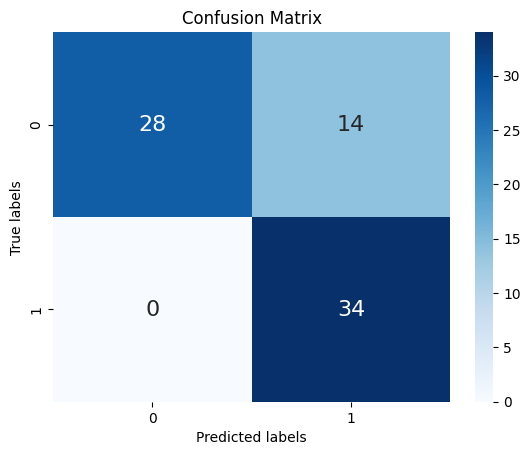

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have true_labels and predicted_labels
# Replace these with your actual true and predicted labels


# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Customize labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer

# Assuming you have a tokenizer initialized with the same configuration
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Example test sentences
test_sentences = ["This is a test sentence.", "Another example sentence."]

# Tokenize and pad the test sequences
test_encoded = tokenizer.batch_encode_plus(test_sentences, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='tf')

# Ensure the input names match the expected names in the loaded model
input_names = ['input_ids', 'attention_mask', 'token_type_ids']
inputs = {name: test_encoded[name] for name in input_names}

# Get predictions using the model
logits = loaded_model(inputs)['logits']
probabilities = tf.nn.softmax(logits, axis=-1)
predicted_classes = tf.argmax(probabilities, axis=-1)

# Print the shapes of true_labels and predicted_labels
print("Shape of true_labels:", true_labels.shape)
print("Shape of predicted_labels:", predicted_classes.numpy().shape)


Shape of true_labels: (76,)
Shape of predicted_labels: (2,)


In [ ]:
model_Bert.save('/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/model_bert',  save_format='tf')

In [ ]:
loaded_model = tf.keras.models.load_model('path/to/save/model')

## RoBERTa

In [ ]:
from sklearn.metrics import accuracy_score

import numpy as np

In [ ]:
pip install tokenizers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 21.0 MB/s eta 0:00:00


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.1
    Uninstalling huggingface-hub-0.19.1:
      Successfully uninstalled huggingface-hub-0.19.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0


In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers

from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
MAX_LEN = 256

In [ ]:
def roberta_encode(texts, tokenizer):
  ct = len(texts)
  input_ids = np.ones((ct, MAX_LEN), dtype = 'int32')
  attention_mask = np.zeros((ct, MAX_LEN), dtype = 'int32')
  token_type_ids = np.zeros((ct,MAX_LEN), dtype = 'int32')

  for k, text in enumerate(texts):
    tok_text = tokenizer.tokenize(text)

    enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])

    input_length = len(enc_text) + 2
    input_length = input_length if input_length < MAX_LEN else MAX_LEN

    # Add tokens [CLS] and [SEP] at the beginning and the end
    input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')

    # Set to 1s in the attention input
    attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/RoBERTa/best_model1.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True)

In [ ]:
train_sentences = roberta_encode(train_sentences, tokenizer)
val_sentences = roberta_encode(val_sentences, tokenizer)

In [ ]:
train_labels = np.asarray(train_labels, dtype = 'int32')
val_labels = np.asarray(val_labels, dtype = 'int32')

In [ ]:
def build_model(num_classes = 2):
      input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
      input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
      input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

      # Import RoBERTa model from HuggingFace
      roberta_model = TFRobertaModel.from_pretrained('roberta-base')
      x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

      # Huggingface transformers have multiple outputs, embeddings are the first one,
      # so let's slice out the first position
      x = x[0]

      x = tf.keras.layers.Dropout(0.1)(x)
      x = tf.keras.layers.Flatten()(x)
      x = tf.keras.layers.Dense(256, activation='relu')(x)
      x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

      model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
      model.compile(
          optimizer=tf.keras.optimizers.Adam(lr=1e-5),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

      return model

In [ ]:
model = build_model(num_classes = 2)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 256)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                            

In [ ]:
history = model.fit(train_sentences,
                        train_labels,
                        epochs=15,
                        batch_size=32,
                        verbose=1,
                        callbacks = [checkpoint],
                        validation_data=(val_sentences, val_labels))

Epoch 1/15


5/5 [==============================] - 75s 8s/step - loss: 43.4535 - accuracy: 0.5063 - val_loss: 16.8765 - val_accuracy: 0.6667
Epoch 2/15
5/5 [==============================] - 9s 2s/step - loss: 72.3518 - accuracy: 0.4557 - val_loss: 4.6505 - val_accuracy: 0.6667
Epoch 3/15
5/5 [==============================] - 9s 2s/step - loss: 11.3639 - accuracy: 0.5316 - val_loss: 8.4741 - val_accuracy: 0.3333
Epoch 4/15
5/5 [==============================] - 9s 2s/step - loss: 2.1498 - accuracy: 0.5443 - val_loss: 0.7242 - val_accuracy: 0.3333
Epoch 5/15
5/5 [==============================] - 9s 2s/step - loss: 0.6917 - accuracy: 0.4810 - val_loss: 0.6928 - val_accuracy: 0.6667
Epoch 6/15
5/5 [==============================] - 9s 2s/step - loss: 0.6951 - accuracy: 0.4557 - val_loss: 0.6927 - val_accuracy: 0.6667
Epoch 7/15
5/5 [==============================] - 8s 2s/step - loss: 0.6933 - accuracy: 0.4557 - val_loss: 0.6927 - val_accuracy: 0.6667
Epoch 8/15
5/5 [==============================]

In [ ]:
y_predicted = model.predict(test_sentences)
y_predicted = y_predicted.flatten()

ValueError: ignored

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.65, 1, 0)
y_predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_matrix = confusion_matrix(test_labels, y_predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, print a classification report
print("\nClassification Report:")
print(classification_report(test_labels, y_predicted))

In [ ]:
pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 17.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text, training = False)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351724, -0.5132727 , -0.88845736, ..., -0.7474883 ,
        -0.75314754,  0.91964495],
       [-0.87208354, -0.50543964, -0.94446665, ..., -0.85847497,
        -0.71745336,  0.88082975]], dtype=float32)>

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_filepath2 = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/pretrained_bert'
model_checkpoint_callback2 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # 1 for progress updates, 0 for silent
)

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/pretrained_bert')

RuntimeError: ignored

In [ ]:
model.fit(train_sentences, train_labels, epochs=50, validation_data = (val_sentences,val_labels),
    batch_size = 32,
    callbacks=[model_checkpoint_callback2])

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.3404 - accuracy: 0.8861 - precision: 0.8864 - recall: 0.9070
Epoch 1: val_accuracy did not improve from 0.83333
5/5 [==============================] - 2s 457ms/step - loss: 0.3404 - accuracy: 0.8861 - precision: 0.8864 - recall: 0.9070 - val_loss: 0.4458 - val_accuracy: 0.7222 - val_precision: 0.5455 - val_recall: 1.0000
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.3379 - accuracy: 0.9051 - precision: 0.9383 - recall: 0.8837
Epoch 2: val_accuracy did not improve from 0.83333
5/5 [==============================] - 2s 444ms/step - loss: 0.3379 - accuracy: 0.9051 - precision: 0.9383 - recall: 0.8837 - val_loss: 0.4387 - val_accuracy: 0.7222 - val_precision: 0.5455 - val_recall: 1.0000
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.3289 - accuracy: 0.9051 - precision: 0.9176 - recall: 0.9070
Epoch 3: val_accuracy did not improve from 0.83333
5/5 [==============================] -

In [ ]:
y_predicted = model.predict(test_sentences)
y_predicted = y_predicted.flatten()

3/3 [==============================] - 1s 333ms/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.65, 1, 0)
y_predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_matrix = confusion_matrix(test_labels, y_predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, print a classification report
print("\nClassification Report:")
print(classification_report(test_labels, y_predicted))

Confusion Matrix:
[[40  2]
 [ 6 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.93      0.82      0.87        34

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



In [ ]:
new = [" I  choose the Statue of Liberty. The Statue of Liberty is a symbol of freedom and democracy, representing the values that my country was founded upon.The Statue of Liberty was a gift from France to the United States, and it has become one of the most iconic symbols of our country. It stands tall in the New York harbor, welcoming immigrants and visitors alike to our shores. The statue represents the ideals of freedom, liberty, and equality that have long been associated with the United States. Another example sentence."]
new2 = ['If I were asked to send one thing representing my country to an international exhibition, I would choose the Statue of Liberty. The Statue of Liberty is a symbol of freedom and democracy, representing the values that my country was founded upon.The Statue of Liberty was a gift from France to the United States, and it has become one of the most iconic symbols of our country. It stands tall in the New York harbor, welcoming immigrants and visitors alike to our shores. The statue represents the ideals of freedom, liberty, and equality that have long been associated with the United States. One of the reasons I would choose the Statue of Liberty to represent my country is that it symbolizes our commitment to freedom and democracy. The statue was given to the United States by France as a symbol of the friendship and alliance between the two countries, and it stands as a reminder of the values that both nations hold dear. Another reason I would choose the Statue of Liberty is that it embodies the spirit of America as a melting pot of different cultures and backgrounds. The statue was designed by French sculptor Fr�d�ric Auguste Bartholdi, but it was constructed in the United States by workers from many different ethnic backgrounds. This represents the diverse makeup of our country and the fact that people from all over the world have contributed to our nation']

In [ ]:
y_predicted = model.predict(new2)

1/1 [==============================] - 0s 43ms/step


In [ ]:
y_predicted

array([[0.9979291]], dtype=float32)

In [ ]:
y_predicted = np.where(y_predicted > 0.65, 1, 0)
y_predicted

array([[1]])

## SHAP

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.7 MB/s eta 0:00:00


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.9 MB/s eta 0:00:00


In [ ]:
import shap
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

# Assuming you have loaded your model and have a BERT tokenizer
# Replace 'bert_preprocess' and 'bert_encoder' with your actual preprocessing and encoding layers

# Tokenize and pad the test sequences
test_sentences = ["your test sentence"]  # Replace with your actual test data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
test_encoded = tokenizer(test_sentences, padding=True, truncation=True, return_tensors='tf')

# Ensure the input names match the expected names in the loaded model
input_names = ['input_ids', 'attention_mask', 'token_type_ids']
inputs = {name: test_encoded[name] for name in input_names}

# Create a SHAP explainer for your model using the Text masker
text_masker = shap.maskers.Text(tokenizer)
explainer = shap.Explainer(model, masker=text_masker)

# Explain predictions for a specific instance (change the index according to your dataset)
instance_idx = 0
shap_values = explainer.shap_values([inputs['input_ids'][instance_idx]])

# Summarize the feature importance
shap.summary_plot(shap_values, feature_names=['input_ids', 'attention_mask', 'token_type_ids'], plot_type='bar')

# Optionally, you can visualize individual instance explanations
shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=['input_ids', 'attention_mask', 'token_type_ids'])


AttributeError: ignored